<a href="https://colab.research.google.com/github/SanyaKapoor/Classification/blob/main/ADABOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving data_banknote_authentication.xls to data_banknote_authentication.xls


In [ ]:
import pandas as pd
data = pd.read_excel("data_banknote_authentication.xls")

In [ ]:
data.head()

,3.62160,8.66610,-2.80730,-0.44699,0.00000
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
data.columns = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Class']

In [ ]:
data.head()

,Feature1,Feature2,Feature3,Feature4,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
y = data.Class
X = data[['Feature1', 'Feature2','Feature3','Feature4']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(input_dim = 4, units = 10, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=500, epochs=10)
model.evaluate(X_test,y_test)

Epoch 1/10
2/2 [==============================] - 0s 4ms/step - loss: 0.6885 - accuracy: 0.6122
Epoch 2/10
2/2 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6155
Epoch 3/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.6471
Epoch 4/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.6874
Epoch 5/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.6961
Epoch 6/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6895
Epoch 7/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.6852
Epoch 8/10
2/2 [==============================] - 0s 5ms/step - loss: 0.6777 - accuracy: 0.6830
Epoch 9/10
2/2 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6797
Epoch 10/10
15/15 [==============================] - 0s 1ms/step - loss: 0.6705 - accuracy: 0.7042


[0.6705325841903687, 0.7041942477226257]

In [ ]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

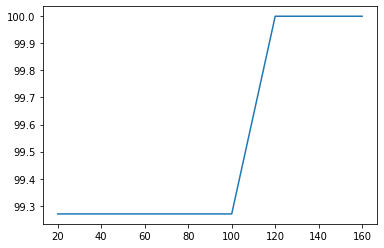

In [ ]:
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))
l = [20, 40, 60, 80, 100, 120, 140, 160]
acc =[]
for i in l:
      classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=i)
      kf = KFold(n_splits=10)
      kf.split(data)
      for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = classifier.fit(X_train, y_train)
      acc.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)    
import matplotlib.pyplot as plt
plt.plot(l,acc)
plt.show()